In [1]:
# Import dependencies
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import datetime as dt

In [2]:
# Use Pandas to read the Minneapolis crime data and moon data
mpls_crime_data_2015 = pd.read_csv("Mpls_Police_Incidents_2015.csv")
mpls_crime_data_2016 = pd.read_csv("Mpls_Police_Incidents_2016.csv")
mpls_crime_data_2017 = pd.read_csv("Mpls_Police_Incidents_2017.csv")
moon_data = pd.read_csv("moon_phases_2015 through 2017.csv")
moon_data.head()

,Full Date,Year,Day,Month,Percent Illumination,Moon Phase
0,1/1/2015,2015,1,1,84.00%,Waxing gibbous
1,1/2/2015,2015,2,1,91.00%,Waxing gibbous
2,1/3/2015,2015,3,1,96.00%,Waxing gibbous
3,1/4/2015,2015,4,1,99.00%,Waxing gibbous
4,1/5/2015,2015,5,1,100.00%,Full Moon


In [3]:
mpls_crime_data_2015.head()

,PublicAddress,ControlNbr,CCN,Precinct,ReportedDate,BeginDate,Time,Offense,Description,UCRCode,EnteredDate,GBSID,Lat,Long,X,Y,Neighborhood,LastChanged,LastUpdateDate,ESRI_OID
0,0032XX Lake ST W,3421476,MP 2015 214102,5,2015-06-12T10:25:00.000Z,2015-06-11T17:30:00.000Z,17:30:00,BURGB,Burglary Of Business,6,2015-06-12T10:24:39.000Z,16973.0,44.948416,-93.322806,-1.038865e+07,5.613404e+06,CEDAR - ISLES - DEAN,2015-06-15T07:46:21.000Z,2017-03-03T13:40:06.000Z,8001
1,0032XX Lake ST W,3421480,MP 2015 214103,5,2015-06-12T10:42:00.000Z,2015-06-11T20:15:00.000Z,20:15:00,BURGB,Burglary Of Business,6,2015-06-12T10:41:18.000Z,16973.0,44.948416,-93.322806,-1.038865e+07,5.613404e+06,CEDAR - ISLES - DEAN,2015-06-15T07:47:43.000Z,2017-03-03T13:40:06.000Z,8002
2,0032XX Lake ST W,3421483,MP 2015 214106,5,2015-06-12T10:56:00.000Z,2015-06-11T20:00:00.000Z,20:00:00,BURGB,Burglary Of Business,6,2015-06-12T10:55:54.000Z,16973.0,44.948416,-93.322806,-1.038865e+07,5.613404e+06,CEDAR - ISLES - DEAN,2015-06-16T12:47:22.000Z,2017-03-03T13:40:06.000Z,8003
3,0010XX Knox AV N,3421485,MP 2015 214187,4,2015-06-12T11:03:00.000Z,2015-06-11T09:43:00.000Z,09:43:00,CSCR,Crim Sex Cond-rape,3,2015-06-12T11:02:13.000Z,22235.0,44.988301,-93.301967,-1.038633e+07,5.619680e+06,NEAR - NORTH,2015-06-26T07:16:57.000Z,2017-03-03T13:40:06.000Z,8004
4,0048XX Girard AV N,3421489,MP 2015 214266,4,2015-06-12T11:05:00.000Z,2015-06-11T22:00:00.000Z,22:00:00,TFMV,Theft From Motr Vehc,7,2015-06-12T11:10:30.000Z,10871.0,45.043006,-93.297904,-1.038588e+07,5.628295e+06,LIND - BOHANON,2015-06-18T06:12:11.000Z,2017-03-03T13:40:06.000Z,8005


In [4]:
mpls_crime_data_2016.head()

,PublicAddress,ControlNbr,CCN,Precinct,ReportedDate,BeginDate,Time,Offense,Description,UCRCode,EnteredDate,GBSID,Lat,Long,X,Y,Neighborhood,LastChanged,LastUpdateDate,ESRI_OID
0,0005XX 8 AV SE,3494616,MP 2016 000079,2,2016-01-01T01:36:00.000Z,2016-01-01T00:37:00.000Z,00:37:00,MURDR,Murder (general),1,2016-01-01T01:36:34.000Z,21226.0,44.985285,-93.242935,-1.037976e+07,5.619205e+06,MARCY HOLMES,2016-06-22T12:58:18.000Z,2017-03-03T13:40:06.000Z,1
1,0003XX 17 AV NE,3494617,MP 2015 470887,2,2016-01-01T01:40:00.000Z,2015-12-31T23:53:00.000Z,23:53:00,ASLT2,Asslt W/dngrs Weapon,5,2016-01-01T01:38:20.000Z,15283.0,45.005276,-93.263861,-1.038209e+07,5.622352e+06,SHERIDAN,2016-01-01T07:23:34.000Z,2017-03-03T13:40:06.000Z,2
2,0009XX Washington AV S,3494618,MP 2016 000094,1,2016-01-01T02:00:00.000Z,2016-01-01T00:46:00.000Z,00:46:00,DASLT1,1st Deg Domes Asslt,5,2016-01-01T01:38:46.000Z,25093.0,44.976351,-93.255141,-1.038111e+07,5.617799e+06,DOWNTOWN EAST,2016-01-02T12:59:52.000Z,2017-03-03T13:40:06.000Z,3
3,0002XX Market ST,3494619,MP 2015 470861,4,2016-01-01T01:43:00.000Z,2015-12-31T23:24:00.000Z,23:24:00,ASLT4,Aslt-police/emerg P,5,2016-01-01T01:43:33.000Z,18914.0,44.980229,-93.289832,-1.038498e+07,5.618409e+06,SUMNER - GLENWOOD,2016-02-08T23:04:56.000Z,2017-03-03T13:40:06.000Z,4
4,0006XX 2 AV S,3494624,MP 2016 000177,1,2016-01-01T02:10:00.000Z,2016-01-01T01:20:00.000Z,01:20:00,BURGB,Burglary Of Business,6,2016-01-01T02:11:40.000Z,17250.0,44.976224,-93.269109,-1.038267e+07,5.617779e+06,DOWNTOWN WEST,2016-01-11T11:11:10.000Z,2017-03-03T13:40:06.000Z,5


In [5]:
mpls_crime_data_2017.head()

,PublicAddress,ControlNbr,CCN,Precinct,ReportedDate,BeginDate,Time,Offense,Description,UCRCode,EnteredDate,GBSID,Lat,Long,X,Y,Neighborhood,LastChanged,LastUpdateDate,OBJECTID
0,0010XX 27 AV SE,3660458,MP 2017 998109,2.0,2017-04-12T17:09:59.000Z,2017-04-08T15:43:00.000Z,15:43:00,THEFT,Other Theft,7,2017-04-12T17:09:59.000Z,21426.0,44.988868,-93.215180,-1.037667e+07,5.619769e+06,COMO,2017-04-12T17:10:02.000Z,2017-04-12T20:00:31.000Z,1001
1,0006XX Nicollet Mall,3660463,MP 2017 130776,1.0,2017-04-12T17:52:00.000Z,2017-04-12T11:37:00.000Z,11:37:00,THEFT,Other Theft,7,2017-04-12T17:50:57.000Z,21933.0,44.977367,-93.271796,-1.038297e+07,5.617959e+06,DOWNTOWN WEST,2017-04-12T19:59:26.000Z,2017-04-12T20:00:31.000Z,1002
2,Broadway AV W / Penn AV N,3670871,MP 2017 172790,4.0,2017-05-12T18:57:00.000Z,2017-05-12T01:30:00.000Z,01:30:00,CSCR,Crim Sex Cond-rape,3,2017-05-12T18:55:35.000Z,NaN,45.003870,-93.308200,-1.038702e+07,5.622130e+06,WILLARD - HAY,2017-05-16T03:56:02.000Z,2017-05-16T20:00:34.000Z,1003
3,0019XX Marshall ST NE,3671162,MP 2017 174973,2.0,2017-05-14T01:50:00.000Z,2017-05-13T23:55:00.000Z,23:55:00,TFMV,Theft From Motr Vehc,7,2017-05-14T01:48:41.000Z,15276.0,45.008036,-93.271699,-1.038296e+07,5.622787e+06,BOTTINEAU,2017-05-16T11:28:33.000Z,2017-05-16T20:00:34.000Z,1004
4,0000XX 6 AV SE,3671205,MP 2017 175162,2.0,2017-05-14T06:30:00.000Z,2017-05-14T03:10:00.000Z,03:10:00,ROBPAG,Robbery Per Agg,4,2017-05-14T06:23:30.000Z,17863.0,44.981687,-93.249542,-1.038049e+07,5.618639e+06,MARCY HOLMES,2017-05-16T11:24:07.000Z,2017-05-16T20:00:34.000Z,1005


In [6]:
# The data for 2017 has OBJECTID instead of ESRI_OID, but it is not needed for our analysis.
mpls_crime_data_2015.columns

Index(['PublicAddress', 'ControlNbr', 'CCN', 'Precinct', 'ReportedDate',
       'BeginDate', 'Time', 'Offense', 'Description', 'UCRCode', 'EnteredDate',
       'GBSID', 'Lat', 'Long', 'X', 'Y', 'Neighborhood', 'LastChanged',
       'LastUpdateDate', 'ESRI_OID'],
      dtype='object')

In [7]:
mpls_crime_data_2016.columns

Index(['PublicAddress', 'ControlNbr', 'CCN', 'Precinct', 'ReportedDate',
       'BeginDate', 'Time', 'Offense', 'Description', 'UCRCode', 'EnteredDate',
       'GBSID', 'Lat', 'Long', 'X', 'Y', 'Neighborhood', 'LastChanged',
       'LastUpdateDate', 'ESRI_OID'],
      dtype='object')

In [8]:
mpls_crime_data_2017.columns

Index(['PublicAddress', 'ControlNbr', 'CCN', 'Precinct', 'ReportedDate',
       'BeginDate', 'Time', 'Offense', 'Description', 'UCRCode', 'EnteredDate',
       'GBSID', 'Lat', 'Long', 'X', 'Y', 'Neighborhood', 'LastChanged',
       'LastUpdateDate', 'OBJECTID'],
      dtype='object')

In [9]:
# Append data sets for 2015 and 2016 into a new data frame
mpls_crime_data = mpls_crime_data_2015.append(mpls_crime_data_2016, ignore_index=True)
print(f"Number of rows = {len(mpls_crime_data)}")
mpls_crime_data.head()

Number of rows = 40153


,PublicAddress,ControlNbr,CCN,Precinct,ReportedDate,BeginDate,Time,Offense,Description,UCRCode,EnteredDate,GBSID,Lat,Long,X,Y,Neighborhood,LastChanged,LastUpdateDate,ESRI_OID
0,0032XX Lake ST W,3421476,MP 2015 214102,5,2015-06-12T10:25:00.000Z,2015-06-11T17:30:00.000Z,17:30:00,BURGB,Burglary Of Business,6,2015-06-12T10:24:39.000Z,16973.0,44.948416,-93.322806,-1.038865e+07,5.613404e+06,CEDAR - ISLES - DEAN,2015-06-15T07:46:21.000Z,2017-03-03T13:40:06.000Z,8001
1,0032XX Lake ST W,3421480,MP 2015 214103,5,2015-06-12T10:42:00.000Z,2015-06-11T20:15:00.000Z,20:15:00,BURGB,Burglary Of Business,6,2015-06-12T10:41:18.000Z,16973.0,44.948416,-93.322806,-1.038865e+07,5.613404e+06,CEDAR - ISLES - DEAN,2015-06-15T07:47:43.000Z,2017-03-03T13:40:06.000Z,8002
2,0032XX Lake ST W,3421483,MP 2015 214106,5,2015-06-12T10:56:00.000Z,2015-06-11T20:00:00.000Z,20:00:00,BURGB,Burglary Of Business,6,2015-06-12T10:55:54.000Z,16973.0,44.948416,-93.322806,-1.038865e+07,5.613404e+06,CEDAR - ISLES - DEAN,2015-06-16T12:47:22.000Z,2017-03-03T13:40:06.000Z,8003
3,0010XX Knox AV N,3421485,MP 2015 214187,4,2015-06-12T11:03:00.000Z,2015-06-11T09:43:00.000Z,09:43:00,CSCR,Crim Sex Cond-rape,3,2015-06-12T11:02:13.000Z,22235.0,44.988301,-93.301967,-1.038633e+07,5.619680e+06,NEAR - NORTH,2015-06-26T07:16:57.000Z,2017-03-03T13:40:06.000Z,8004
4,0048XX Girard AV N,3421489,MP 2015 214266,4,2015-06-12T11:05:00.000Z,2015-06-11T22:00:00.000Z,22:00:00,TFMV,Theft From Motr Vehc,7,2015-06-12T11:10:30.000Z,10871.0,45.043006,-93.297904,-1.038588e+07,5.628295e+06,LIND - BOHANON,2015-06-18T06:12:11.000Z,2017-03-03T13:40:06.000Z,8005


In [10]:
# Append data for 2017 into the new data frame
mpls_crime_data = mpls_crime_data.append(mpls_crime_data_2017, ignore_index=True, sort=True)
print(f"Number of rows = {len(mpls_crime_data)}")
mpls_crime_data.head()

Number of rows = 62238


,BeginDate,CCN,ControlNbr,Description,ESRI_OID,EnteredDate,GBSID,LastChanged,LastUpdateDate,Lat,...,Neighborhood,OBJECTID,Offense,Precinct,PublicAddress,ReportedDate,Time,UCRCode,X,Y
0,2015-06-11T17:30:00.000Z,MP 2015 214102,3421476,Burglary Of Business,8001.0,2015-06-12T10:24:39.000Z,16973.0,2015-06-15T07:46:21.000Z,2017-03-03T13:40:06.000Z,44.948416,...,CEDAR - ISLES - DEAN,NaN,BURGB,5.0,0032XX Lake ST W,2015-06-12T10:25:00.000Z,17:30:00,6,-1.038865e+07,5.613404e+06
1,2015-06-11T20:15:00.000Z,MP 2015 214103,3421480,Burglary Of Business,8002.0,2015-06-12T10:41:18.000Z,16973.0,2015-06-15T07:47:43.000Z,2017-03-03T13:40:06.000Z,44.948416,...,CEDAR - ISLES - DEAN,NaN,BURGB,5.0,0032XX Lake ST W,2015-06-12T10:42:00.000Z,20:15:00,6,-1.038865e+07,5.613404e+06
2,2015-06-11T20:00:00.000Z,MP 2015 214106,3421483,Burglary Of Business,8003.0,2015-06-12T10:55:54.000Z,16973.0,2015-06-16T12:47:22.000Z,2017-03-03T13:40:06.000Z,44.948416,...,CEDAR - ISLES - DEAN,NaN,BURGB,5.0,0032XX Lake ST W,2015-06-12T10:56:00.000Z,20:00:00,6,-1.038865e+07,5.613404e+06
3,2015-06-11T09:43:00.000Z,MP 2015 214187,3421485,Crim Sex Cond-rape,8004.0,2015-06-12T11:02:13.000Z,22235.0,2015-06-26T07:16:57.000Z,2017-03-03T13:40:06.000Z,44.988301,...,NEAR - NORTH,NaN,CSCR,4.0,0010XX Knox AV N,2015-06-12T11:03:00.000Z,09:43:00,3,-1.038633e+07,5.619680e+06
4,2015-06-11T22:00:00.000Z,MP 2015 214266,3421489,Theft From Motr Vehc,8005.0,2015-06-12T11:10:30.000Z,10871.0,2015-06-18T06:12:11.000Z,2017-03-03T13:40:06.000Z,45.043006,...,LIND - BOHANON,NaN,TFMV,4.0,0048XX Girard AV N,2015-06-12T11:05:00.000Z,22:00:00,7,-1.038588e+07,5.628295e+06


In [11]:
# Rename Full Date column
moon_data.rename(columns = {'Full Date':'Date'}, inplace = True)
moon_data.head()

,Date,Year,Day,Month,Percent Illumination,Moon Phase
0,1/1/2015,2015,1,1,84.00%,Waxing gibbous
1,1/2/2015,2015,2,1,91.00%,Waxing gibbous
2,1/3/2015,2015,3,1,96.00%,Waxing gibbous
3,1/4/2015,2015,4,1,99.00%,Waxing gibbous
4,1/5/2015,2015,5,1,100.00%,Full Moon


In [12]:
# Convert Date column from m/d/yyyy to yyyy-mm-dd format
moon_data["Date"] = moon_data["Date"].apply(lambda x: str(dt.datetime.strptime(x, '%m/%d/%Y'))[:10] )
print(f"Number of rows = {len(moon_data)}")
moon_data.head()

Number of rows = 1096


,Date,Year,Day,Month,Percent Illumination,Moon Phase
0,2015-01-01,2015,1,1,84.00%,Waxing gibbous
1,2015-01-02,2015,2,1,91.00%,Waxing gibbous
2,2015-01-03,2015,3,1,96.00%,Waxing gibbous
3,2015-01-04,2015,4,1,99.00%,Waxing gibbous
4,2015-01-05,2015,5,1,100.00%,Full Moon


In [13]:
# Add new column Date from BeginDate in yyyy-mm-dd format
mpls_crime_data["Date"] = mpls_crime_data["BeginDate"].apply(lambda x: str(dt.datetime.strptime(x, '%Y-%m-%dT%H:%M:%S.000Z'))[:10] )
print(f"Number of rows = {len(mpls_crime_data)}")
mpls_crime_data.head()

Number of rows = 62238


,BeginDate,CCN,ControlNbr,Description,ESRI_OID,EnteredDate,GBSID,LastChanged,LastUpdateDate,Lat,...,OBJECTID,Offense,Precinct,PublicAddress,ReportedDate,Time,UCRCode,X,Y,Date
0,2015-06-11T17:30:00.000Z,MP 2015 214102,3421476,Burglary Of Business,8001.0,2015-06-12T10:24:39.000Z,16973.0,2015-06-15T07:46:21.000Z,2017-03-03T13:40:06.000Z,44.948416,...,NaN,BURGB,5.0,0032XX Lake ST W,2015-06-12T10:25:00.000Z,17:30:00,6,-1.038865e+07,5.613404e+06,2015-06-11
1,2015-06-11T20:15:00.000Z,MP 2015 214103,3421480,Burglary Of Business,8002.0,2015-06-12T10:41:18.000Z,16973.0,2015-06-15T07:47:43.000Z,2017-03-03T13:40:06.000Z,44.948416,...,NaN,BURGB,5.0,0032XX Lake ST W,2015-06-12T10:42:00.000Z,20:15:00,6,-1.038865e+07,5.613404e+06,2015-06-11
2,2015-06-11T20:00:00.000Z,MP 2015 214106,3421483,Burglary Of Business,8003.0,2015-06-12T10:55:54.000Z,16973.0,2015-06-16T12:47:22.000Z,2017-03-03T13:40:06.000Z,44.948416,...,NaN,BURGB,5.0,0032XX Lake ST W,2015-06-12T10:56:00.000Z,20:00:00,6,-1.038865e+07,5.613404e+06,2015-06-11
3,2015-06-11T09:43:00.000Z,MP 2015 214187,3421485,Crim Sex Cond-rape,8004.0,2015-06-12T11:02:13.000Z,22235.0,2015-06-26T07:16:57.000Z,2017-03-03T13:40:06.000Z,44.988301,...,NaN,CSCR,4.0,0010XX Knox AV N,2015-06-12T11:03:00.000Z,09:43:00,3,-1.038633e+07,5.619680e+06,2015-06-11
4,2015-06-11T22:00:00.000Z,MP 2015 214266,3421489,Theft From Motr Vehc,8005.0,2015-06-12T11:10:30.000Z,10871.0,2015-06-18T06:12:11.000Z,2017-03-03T13:40:06.000Z,45.043006,...,NaN,TFMV,4.0,0048XX Girard AV N,2015-06-12T11:05:00.000Z,22:00:00,7,-1.038588e+07,5.628295e+06,2015-06-11


In [14]:
# Remove data before 1/1/2015
print(f"old data set size = {len(mpls_crime_data)}")
print(f"old date range = {mpls_crime_data['Date'].min()} to {mpls_crime_data['Date'].max()}")
mpls_crime_data = mpls_crime_data.loc[mpls_crime_data['Date'] >= '2015-01-01',:]

print(f"new data set size = {len(mpls_crime_data)}")
print(f"new date range = {mpls_crime_data['Date'].min()} to {mpls_crime_data['Date'].max()}")
mpls_crime_data.head()

old data set size = 62238
old date range = 2010-05-03 to 2017-12-31
new data set size = 61962
new date range = 2015-01-01 to 2017-12-31


,BeginDate,CCN,ControlNbr,Description,ESRI_OID,EnteredDate,GBSID,LastChanged,LastUpdateDate,Lat,...,OBJECTID,Offense,Precinct,PublicAddress,ReportedDate,Time,UCRCode,X,Y,Date
0,2015-06-11T17:30:00.000Z,MP 2015 214102,3421476,Burglary Of Business,8001.0,2015-06-12T10:24:39.000Z,16973.0,2015-06-15T07:46:21.000Z,2017-03-03T13:40:06.000Z,44.948416,...,NaN,BURGB,5.0,0032XX Lake ST W,2015-06-12T10:25:00.000Z,17:30:00,6,-1.038865e+07,5.613404e+06,2015-06-11
1,2015-06-11T20:15:00.000Z,MP 2015 214103,3421480,Burglary Of Business,8002.0,2015-06-12T10:41:18.000Z,16973.0,2015-06-15T07:47:43.000Z,2017-03-03T13:40:06.000Z,44.948416,...,NaN,BURGB,5.0,0032XX Lake ST W,2015-06-12T10:42:00.000Z,20:15:00,6,-1.038865e+07,5.613404e+06,2015-06-11
2,2015-06-11T20:00:00.000Z,MP 2015 214106,3421483,Burglary Of Business,8003.0,2015-06-12T10:55:54.000Z,16973.0,2015-06-16T12:47:22.000Z,2017-03-03T13:40:06.000Z,44.948416,...,NaN,BURGB,5.0,0032XX Lake ST W,2015-06-12T10:56:00.000Z,20:00:00,6,-1.038865e+07,5.613404e+06,2015-06-11
3,2015-06-11T09:43:00.000Z,MP 2015 214187,3421485,Crim Sex Cond-rape,8004.0,2015-06-12T11:02:13.000Z,22235.0,2015-06-26T07:16:57.000Z,2017-03-03T13:40:06.000Z,44.988301,...,NaN,CSCR,4.0,0010XX Knox AV N,2015-06-12T11:03:00.000Z,09:43:00,3,-1.038633e+07,5.619680e+06,2015-06-11
4,2015-06-11T22:00:00.000Z,MP 2015 214266,3421489,Theft From Motr Vehc,8005.0,2015-06-12T11:10:30.000Z,10871.0,2015-06-18T06:12:11.000Z,2017-03-03T13:40:06.000Z,45.043006,...,NaN,TFMV,4.0,0048XX Girard AV N,2015-06-12T11:05:00.000Z,22:00:00,7,-1.038588e+07,5.628295e+06,2015-06-11


In [15]:
# Combine the data into a single dataset
mpls_data_comp = pd.merge(mpls_crime_data, moon_data, how="left", on = 'Date')
print(f"Number of rows = {len(mpls_data_comp)}")
mpls_data_comp

Number of rows = 61962


,BeginDate,CCN,ControlNbr,Description,ESRI_OID,EnteredDate,GBSID,LastChanged,LastUpdateDate,Lat,...,Time,UCRCode,X,Y,Date,Year,Day,Month,Percent Illumination,Moon Phase
0,2015-06-11T17:30:00.000Z,MP 2015 214102,3421476,Burglary Of Business,8001.0,2015-06-12T10:24:39.000Z,16973.0,2015-06-15T07:46:21.000Z,2017-03-03T13:40:06.000Z,44.948416,...,17:30:00,6,-1.038865e+07,5.613404e+06,2015-06-11,2015,11,6,32.00%,Waning crescent
1,2015-06-11T20:15:00.000Z,MP 2015 214103,3421480,Burglary Of Business,8002.0,2015-06-12T10:41:18.000Z,16973.0,2015-06-15T07:47:43.000Z,2017-03-03T13:40:06.000Z,44.948416,...,20:15:00,6,-1.038865e+07,5.613404e+06,2015-06-11,2015,11,6,32.00%,Waning crescent
2,2015-06-11T20:00:00.000Z,MP 2015 214106,3421483,Burglary Of Business,8003.0,2015-06-12T10:55:54.000Z,16973.0,2015-06-16T12:47:22.000Z,2017-03-03T13:40:06.000Z,44.948416,...,20:00:00,6,-1.038865e+07,5.613404e+06,2015-06-11,2015,11,6,32.00%,Waning crescent
3,2015-06-11T09:43:00.000Z,MP 2015 214187,3421485,Crim Sex Cond-rape,8004.0,2015-06-12T11:02:13.000Z,22235.0,2015-06-26T07:16:57.000Z,2017-03-03T13:40:06.000Z,44.988301,...,09:43:00,3,-1.038633e+07,5.619680e+06,2015-06-11,2015,11,6,32.00%,Waning crescent
4,2015-06-11T22:00:00.000Z,MP 2015 214266,3421489,Theft From Motr Vehc,8005.0,2015-06-12T11:10:30.000Z,10871.0,2015-06-18T06:12:11.000Z,2017-03-03T13:40:06.000Z,45.043006,...,22:00:00,7,-1.038588e+07,5.628295e+06,2015-06-11,2015,11,6,32.00%,Waning crescent
5,2015-06-11T23:00:00.000Z,MP 2015 997147,3421491,Theft From Motr Vehc,8006.0,2015-06-12T11:24:59.000Z,11968.0,2015-08-17T13:07:55.000Z,2017-03-03T13:40:06.000Z,44.945639,...,23:00:00,7,-1.038082e+07,5.612967e+06,2015-06-11,2015,11,6,32.00%,Waning crescent
6,2015-06-12T11:11:00.000Z,MP 2015 214290,3421502,Burglary Of Dwelling,8007.0,2015-06-12T11:43:53.000Z,20602.0,2015-06-15T08:51:37.000Z,2017-03-03T13:40:06.000Z,45.005987,...,11:11:00,6,-1.038625e+07,5.622464e+06,2015-06-12,2015,12,6,22.00%,Waning crescent
7,2015-06-12T00:01:00.000Z,MP 2015 214277,3421505,Burglary Of Dwelling,8008.0,2015-06-12T11:49:28.000Z,22368.0,2016-01-19T08:03:42.000Z,2017-03-03T13:40:06.000Z,45.021239,...,00:01:00,6,-1.038520e+07,5.624866e+06,2015-06-12,2015,12,6,22.00%,Waning crescent
8,2015-06-11T15:00:00.000Z,MP 2015 997146,3421507,Other Theft,8009.0,2015-06-12T11:53:46.000Z,16489.0,2015-06-12T12:23:09.000Z,2017-03-03T13:40:06.000Z,44.962721,...,15:00:00,7,-1.038138e+07,5.615655e+06,2015-06-11,2015,11,6,32.00%,Waning crescent
9,2015-06-11T11:41:00.000Z,MP 2015 214324,3421516,Other Theft,8010.0,2015-06-12T12:04:12.000Z,12732.0,2015-06-12T12:22:58.000Z,2017-03-03T13:40:06.000Z,44.917006,...,11:41:00,7,-1.038180e+07,5.608465e+06,2015-06-11,2015,11,6,32.00%,Waning crescent


In [16]:
# List of column names in dataframe
mpls_data_comp.columns

Index(['BeginDate', 'CCN', 'ControlNbr', 'Description', 'ESRI_OID',
       'EnteredDate', 'GBSID', 'LastChanged', 'LastUpdateDate', 'Lat', 'Long',
       'Neighborhood', 'OBJECTID', 'Offense', 'Precinct', 'PublicAddress',
       'ReportedDate', 'Time', 'UCRCode', 'X', 'Y', 'Date', 'Year', 'Day',
       'Month', 'Percent Illumination', 'Moon Phase'],
      dtype='object')

In [17]:
# Create new data frame
mpls_data_clean = mpls_data_comp

# Remove unwanted columns
mpls_data_clean.drop(labels=['CCN', 'ESRI_OID', 'GBSID', 'LastChanged', 'LastUpdateDate', 'X', 'Y', 'Year', 'Day', 'Month'], axis=1, inplace=True)
mpls_data_clean

,BeginDate,ControlNbr,Description,EnteredDate,Lat,Long,Neighborhood,OBJECTID,Offense,Precinct,PublicAddress,ReportedDate,Time,UCRCode,Date,Percent Illumination,Moon Phase
0,2015-06-11T17:30:00.000Z,3421476,Burglary Of Business,2015-06-12T10:24:39.000Z,44.948416,-93.322806,CEDAR - ISLES - DEAN,NaN,BURGB,5.0,0032XX Lake ST W,2015-06-12T10:25:00.000Z,17:30:00,6,2015-06-11,32.00%,Waning crescent
1,2015-06-11T20:15:00.000Z,3421480,Burglary Of Business,2015-06-12T10:41:18.000Z,44.948416,-93.322806,CEDAR - ISLES - DEAN,NaN,BURGB,5.0,0032XX Lake ST W,2015-06-12T10:42:00.000Z,20:15:00,6,2015-06-11,32.00%,Waning crescent
2,2015-06-11T20:00:00.000Z,3421483,Burglary Of Business,2015-06-12T10:55:54.000Z,44.948416,-93.322806,CEDAR - ISLES - DEAN,NaN,BURGB,5.0,0032XX Lake ST W,2015-06-12T10:56:00.000Z,20:00:00,6,2015-06-11,32.00%,Waning crescent
3,2015-06-11T09:43:00.000Z,3421485,Crim Sex Cond-rape,2015-06-12T11:02:13.000Z,44.988301,-93.301967,NEAR - NORTH,NaN,CSCR,4.0,0010XX Knox AV N,2015-06-12T11:03:00.000Z,09:43:00,3,2015-06-11,32.00%,Waning crescent
4,2015-06-11T22:00:00.000Z,3421489,Theft From Motr Vehc,2015-06-12T11:10:30.000Z,45.043006,-93.297904,LIND - BOHANON,NaN,TFMV,4.0,0048XX Girard AV N,2015-06-12T11:05:00.000Z,22:00:00,7,2015-06-11,32.00%,Waning crescent
5,2015-06-11T23:00:00.000Z,3421491,Theft From Motr Vehc,2015-06-12T11:24:59.000Z,44.945639,-93.252481,POWDERHORN PARK,NaN,TFMV,3.0,0031XX Bloomington AV S,2015-06-12T11:24:59.000Z,23:00:00,7,2015-06-11,32.00%,Waning crescent
6,2015-06-12T11:11:00.000Z,3421502,Burglary Of Dwelling,2015-06-12T11:43:53.000Z,45.005987,-93.301256,JORDAN,NaN,BURGD,4.0,0016XX 26 AV N,2015-06-12T11:45:00.000Z,11:11:00,6,2015-06-12,22.00%,Waning crescent
7,2015-06-12T00:01:00.000Z,3421505,Burglary Of Dwelling,2015-06-12T11:49:28.000Z,45.021239,-93.291823,MCKINLEY,NaN,BURGD,4.0,0036XX Colfax AV N,2015-06-12T11:30:00.000Z,00:01:00,6,2015-06-12,22.00%,Waning crescent
8,2015-06-11T15:00:00.000Z,3421507,Other Theft,2015-06-12T11:53:46.000Z,44.962721,-93.257495,VENTURA VILLAGE,NaN,THEFT,3.0,0011XX Franklin AV E,2015-06-12T11:53:46.000Z,15:00:00,7,2015-06-11,32.00%,Waning crescent
9,2015-06-11T11:41:00.000Z,3421516,Other Theft,2015-06-12T12:04:12.000Z,44.917006,-93.261340,NORTHROP,NaN,THEFT,3.0,0047XX Elliot AV S,2015-06-12T12:04:00.000Z,11:41:00,7,2015-06-11,32.00%,Waning crescent


In [18]:
# Create an overview table that summarizes necessary data: 

# Total crime by date
mpls_crime_total = pd.DataFrame(mpls_data_clean.Date.value_counts())

# Rename Date column to Total Crimes
mpls_crime_total_rename = mpls_crime_total.rename(columns={'Date': 'Total Crimes'})

# Add index title for Total Crime
mpls_crime_total_rename.index.name = 'Date'

# Merge crime counts with previous total data frame
mpls_totcrime = mpls_data_clean.merge(mpls_crime_total_rename, how='outer', on='Date').drop(['Time', 'Moon Phase'], axis=1)

# Remove duplicate dates/condense
mpls_totcrime_rm = mpls_totcrime.drop_duplicates()

# Sort data frame by date
mpls_sum_bydate = mpls_totcrime_rm.sort_values(by='Date')

# Reset index values
mpls_summary = mpls_sum_bydate.reset_index(drop=True)

# Print the data
# print(mpls_crime_total)
mpls_summary.head()

,BeginDate,ControlNbr,Description,EnteredDate,Lat,Long,Neighborhood,OBJECTID,Offense,Precinct,PublicAddress,ReportedDate,UCRCode,Date,Percent Illumination,Total Crimes
0,2015-01-01T01:40:00.000Z,3363235,Robbery Of Person,2015-01-01T02:49:04.000Z,44.982070,-93.271390,DOWNTOWN WEST,NaN,ROBPER,1.0,1 AV N / 3 ST N,2015-01-01T02:50:00.000Z,4,2015-01-01,84.00%,61
1,2015-01-01T23:25:00.000Z,3363420,Robbery Of Person,2015-01-02T00:08:01.000Z,44.961801,-93.277819,WHITTIER,NaN,ROBPER,5.0,0020XX Nicollet AV S,2015-01-02T00:10:00.000Z,4,2015-01-01,84.00%,61
2,2015-01-01T23:22:00.000Z,3363416,Aslt-police/emerg P,2015-01-01T23:49:31.000Z,45.000270,-93.298820,JORDAN,NaN,ASLT4,4.0,Hillside AV / Irving AV N,2015-01-01T23:49:00.000Z,5,2015-01-01,84.00%,61
3,2015-01-01T20:45:00.000Z,3363413,Shoplifting,2015-01-01T23:22:11.000Z,44.948372,-93.235147,LONGFELLOW,NaN,SHOPLF,3.0,0025XX Lake ST E,2015-01-01T23:25:00.000Z,7,2015-01-01,84.00%,61
4,2015-01-01T22:00:00.000Z,3363410,Motor Vehicle Theft,2015-01-01T23:10:14.000Z,44.959121,-93.260557,VENTURA VILLAGE,NaN,AUTOTH,3.0,0009XX 24 ST E,2015-01-01T23:10:00.000Z,8,2015-01-01,84.00%,61


In [19]:
# Changing the Percent Illumination column data type to a float for binning below
mpls_summary['Percent Illumination'] = mpls_summary['Percent Illumination'].str.rstrip('%').astype('float')
mpls_summary

,BeginDate,ControlNbr,Description,EnteredDate,Lat,Long,Neighborhood,OBJECTID,Offense,Precinct,PublicAddress,ReportedDate,UCRCode,Date,Percent Illumination,Total Crimes
0,2015-01-01T01:40:00.000Z,3363235,Robbery Of Person,2015-01-01T02:49:04.000Z,44.982070,-93.271390,DOWNTOWN WEST,NaN,ROBPER,1.0,1 AV N / 3 ST N,2015-01-01T02:50:00.000Z,4,2015-01-01,84.0,61
1,2015-01-01T23:25:00.000Z,3363420,Robbery Of Person,2015-01-02T00:08:01.000Z,44.961801,-93.277819,WHITTIER,NaN,ROBPER,5.0,0020XX Nicollet AV S,2015-01-02T00:10:00.000Z,4,2015-01-01,84.0,61
2,2015-01-01T23:22:00.000Z,3363416,Aslt-police/emerg P,2015-01-01T23:49:31.000Z,45.000270,-93.298820,JORDAN,NaN,ASLT4,4.0,Hillside AV / Irving AV N,2015-01-01T23:49:00.000Z,5,2015-01-01,84.0,61
3,2015-01-01T20:45:00.000Z,3363413,Shoplifting,2015-01-01T23:22:11.000Z,44.948372,-93.235147,LONGFELLOW,NaN,SHOPLF,3.0,0025XX Lake ST E,2015-01-01T23:25:00.000Z,7,2015-01-01,84.0,61
4,2015-01-01T22:00:00.000Z,3363410,Motor Vehicle Theft,2015-01-01T23:10:14.000Z,44.959121,-93.260557,VENTURA VILLAGE,NaN,AUTOTH,3.0,0009XX 24 ST E,2015-01-01T23:10:00.000Z,8,2015-01-01,84.0,61
5,2015-01-01T21:03:00.000Z,3363407,Burglary Of Dwelling,2015-01-01T22:37:04.000Z,44.996900,-93.249252,ST. ANTHONY EAST,NaN,BURGD,2.0,0008XX Summer ST NE,2015-01-01T23:00:00.000Z,6,2015-01-01,84.0,61
6,2015-01-01T19:16:00.000Z,3363392,Robbery Of Person,2015-01-01T20:13:32.000Z,45.024020,-93.300044,FOLWELL,NaN,ROBPER,4.0,0016XX Dowling AV N,2015-01-01T20:13:00.000Z,4,2015-01-01,84.0,61
7,2015-01-01T17:59:00.000Z,3363390,Asslt W/dngrs Weapon,2015-01-01T19:59:29.000Z,44.999692,-93.310774,WILLARD - HAY,NaN,ASLT2,4.0,0019XX Russell AV N,2015-01-01T20:01:00.000Z,5,2015-01-01,84.0,61
8,2015-01-01T07:00:00.000Z,3363385,Burglary Of Business,2015-01-01T19:24:48.000Z,44.981655,-93.271963,DOWNTOWN WEST,NaN,BURGB,1.0,0003XX 1 AV N,2015-01-01T19:25:00.000Z,6,2015-01-01,84.0,61
9,2015-01-01T17:15:00.000Z,3363380,Robbery Per Agg,2015-01-01T19:01:27.000Z,45.030322,-93.247247,WAITE PARK,NaN,ROBPAG,2.0,0034XX Central AV NE,2015-01-01T19:01:00.000Z,4,2015-01-01,84.0,61


In [20]:
# Create percent illumination bins
bins = [0, 3, 10, 21.5, 35.5, 51, 66, 79, 90, 97, 100]
group_name = ['0-3%', '4-10%', '11-21%', 
              '22-35%', '36-50%', '51-65%', 
              '66-78%', '79-89%', '90-96%', '97-100%']
mpls_summary['% Illumination'] = pd.cut(mpls_summary['Percent Illumination'], 
                                      bins, 
                                      labels = group_name, 
                                      include_lowest=True)
#print(mpls_summary.head())

# Group the merged data by school spending
mpls_by_illumination = mpls_summary.groupby('% Illumination')

# Calculate average crime
mpls_avg_crime = mpls_by_illumination['Total Crimes'].mean()
# print(mpls_avg_crime.head())

# Store illumination bins in a dataframe            
mpls_summary_new = pd.DataFrame({'Average Crime': mpls_avg_crime})

# Print new summary data frame with average crime per day for each group
mpls_summary_new

,Average Crime
% Illumination,
0-3%,59.745179
4-10%,58.798974
11-21%,58.702029
22-35%,58.803487
36-50%,59.199640
51-65%,58.313219
66-78%,60.465200
79-89%,58.880122
90-96%,59.131466


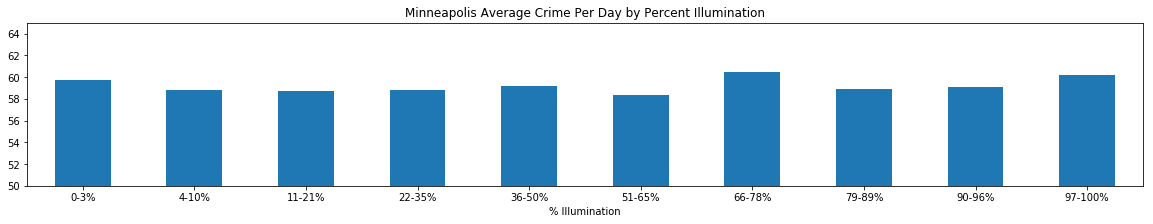

In [21]:
# Use DataFrame.plot() in order to create a bar chart of the data
mpls_summary_new.plot(kind="bar", figsize=(20,3), title='Minneapolis Average Crime Per Day by Percent Illumination', legend=False, 
                    ylim=(50, 65), rot=0)

# Save plot
plt.savefig("mpls_avgcrime_percillum.png")

# Show plot
plt.show()

In [22]:
# Save summary data to csv
mpls_summary.to_csv("mpls_summary.csv")

In [23]:
# Calculate average crime per day
mpls_daily_avg_crime = mpls_crime_total_rename['Total Crimes'].mean()
print(f"Average number of crimes per day = {mpls_daily_avg_crime}")

# Print daily summary data frame
mpls_crime_total_rename

Average number of crimes per day = 56.534671532846716


,Total Crimes
Date,
2015-07-25,95
2016-08-12,92
2016-10-16,92
2015-08-16,91
2017-06-21,91
2016-10-15,91
2017-06-25,89
2016-08-01,89
2017-07-24,87


In [24]:
# Perform t-test on total data, Result is p-Value = 1
stats.ttest_1samp(mpls_crime_total_rename['Total Crimes'], mpls_daily_avg_crime)

Ttest_1sampResult(statistic=0.0, pvalue=1.0)

In [25]:
# Create a daily data frame for total crimes including moon data
mpls_daily_crime_by_moon = pd.merge(mpls_crime_total_rename, moon_data, how="left", on = 'Date')
mpls_daily_crime_by_moon['Percent Illumination'] = mpls_daily_crime_by_moon['Percent Illumination'].str.rstrip('%').astype('float')
print(f"Number of rows = {len(mpls_daily_crime_by_moon)}")
mpls_daily_crime_by_moon = mpls_daily_crime_by_moon.drop(['Year', 'Month', 'Day', 'Moon Phase'], axis = 1)

# Save summary data to csv
mpls_daily_crime_by_moon.to_csv("mpls_summary.csv")

mpls_daily_crime_by_moon

Number of rows = 1096


,Date,Total Crimes,Percent Illumination
0,2015-07-25,95,61.0
1,2016-08-12,92,64.0
2,2016-10-16,92,100.0
3,2015-08-16,91,2.0
4,2017-06-21,91,13.0
5,2016-10-15,91,99.0
6,2017-06-25,89,2.0
7,2016-08-01,89,3.0
8,2017-07-24,87,1.0
9,2015-01-16,87,23.0


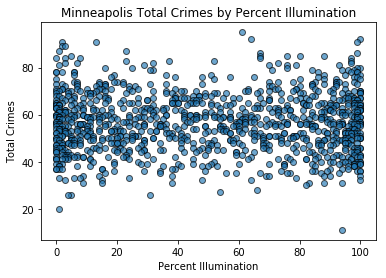

<Figure size 432x288 with 0 Axes>

In [26]:
# Scatter plots for total crimes by percent illumination
plt.scatter(mpls_daily_crime_by_moon['Percent Illumination'], mpls_daily_crime_by_moon['Total Crimes'],
           marker ='o', edgecolors='black', alpha = 0.65, linewidth = 1)
plt.title('Minneapolis Total Crimes by Percent Illumination')
plt.xlabel('Percent Illumination')
plt.ylabel('Total Crimes')
plt.show()

# Save plot
plt.savefig("mpls_total_crimes_scatter.png")

In [27]:
mpls_full_moon = mpls_daily_crime_by_moon.loc[mpls_daily_crime_by_moon['Percent Illumination'] >= 97.0, :]
mpls_full_moon_average = mpls_full_moon['Total Crimes'].mean()
print(f"Average daily crimes during full moon = {mpls_full_moon_average}")

mpls_full_moon


Average daily crimes during full moon = 57.32283464566929


,Date,Total Crimes,Percent Illumination
2,2016-10-16,92,100.0
5,2016-10-15,91,99.0
11,2016-08-19,86,99.0
20,2016-09-18,84,97.0
23,2016-09-15,83,97.0
29,2017-10-07,82,97.0
38,2017-06-09,80,100.0
40,2016-04-23,80,99.0
47,2017-06-08,79,98.0
50,2015-11-25,78,99.0


In [28]:
# Perform t-test for days that full on or near the full moon
mpls_stats, mpls_pvalue = stats.ttest_1samp(mpls_full_moon['Total Crimes'], mpls_daily_avg_crime)
print(mpls_stats)
print(f"Minneapolis p-Value = {mpls_pvalue}")

0.6623024846195658
Minneapolis p-Value = 0.5089869744724294


In [29]:
# Add new column to display the illumination range for each date
mpls_daily_crime_by_moon['% Illumination'] = pd.cut(mpls_daily_crime_by_moon['Percent Illumination'], 
                                      bins, 
                                      labels = group_name, 
                                      include_lowest=True)
print(f"Number of rows = {len(mpls_daily_crime_by_moon)}")

mpls_daily_crime_by_moon.head()


Number of rows = 1096


,Date,Total Crimes,Percent Illumination,% Illumination
0,2015-07-25,95,61.0,51-65%
1,2016-08-12,92,64.0,51-65%
2,2016-10-16,92,100.0,97-100%
3,2015-08-16,91,2.0,0-3%
4,2017-06-21,91,13.0,11-21%


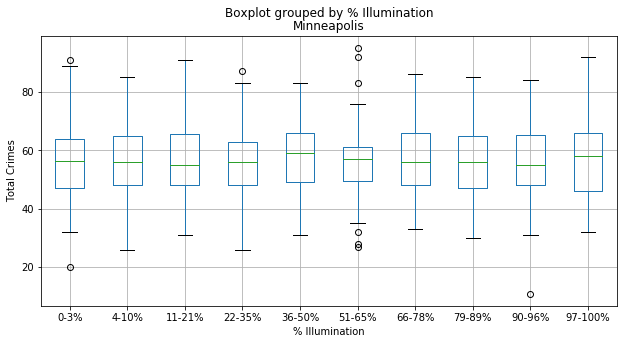

<Figure size 432x288 with 0 Axes>

In [30]:
# Create a boxplot to compare means
mpls_daily_crime_by_moon.boxplot("Total Crimes", by="% Illumination", figsize=(10, 5))
plt.title('Minneapolis')
plt.ylabel('Total Crimes')
plt.show()

# Save plot
plt.savefig("mpls_total_crimes_boxplot.png")

In [31]:
# Extract individual groups for each illumination range
group1 = mpls_daily_crime_by_moon[mpls_daily_crime_by_moon["% Illumination"] == "0-3%"]["Total Crimes"]
group2 = mpls_daily_crime_by_moon[mpls_daily_crime_by_moon["% Illumination"] == "4-10%"]["Total Crimes"]
group3 = mpls_daily_crime_by_moon[mpls_daily_crime_by_moon["% Illumination"] == "11-21%"]["Total Crimes"]
group4 = mpls_daily_crime_by_moon[mpls_daily_crime_by_moon["% Illumination"] == "22-35%"]["Total Crimes"]
group5 = mpls_daily_crime_by_moon[mpls_daily_crime_by_moon["% Illumination"] == "36-50%"]["Total Crimes"]
group6 = mpls_daily_crime_by_moon[mpls_daily_crime_by_moon["% Illumination"] == "51-65%"]["Total Crimes"]
group7 = mpls_daily_crime_by_moon[mpls_daily_crime_by_moon["% Illumination"] == "66-78%"]["Total Crimes"]
group8 = mpls_daily_crime_by_moon[mpls_daily_crime_by_moon["% Illumination"] == "79-89%"]["Total Crimes"]
group9 = mpls_daily_crime_by_moon[mpls_daily_crime_by_moon["% Illumination"] == "90-96%"]["Total Crimes"]
group10 = mpls_daily_crime_by_moon[mpls_daily_crime_by_moon["% Illumination"] == "97-100%"]["Total Crimes"]

In [32]:
# Perform the ANOVA
stats.f_oneway(group1, group2, group3, group4, group5, group6, group7, group8, group9, group10)

F_onewayResult(statistic=0.19835208994437145, pvalue=0.9943765373197161)